# Module 2: Epidemic Modeling

## Team Members:
Kai-Tang Tseng, Lauren Kim

## Project Title:
*(Fill in)*

## Project Goal:
This project seeks to... *(what is the purpose of your project -- i.e., describe the question that you seek to answer by analyzing data.)*

## 1. Data and disease background
You can fill out this section throughout the module as you uncover more information about the mystery disease.

By the end of the module (when submitting), you should have some information about each of the following points:
* Prevalence & incidence in the UVA population
* Economic burden (you can generalize from respiratory viruses)
* Symptoms
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology - you can generalize from viral biology)


## 2. Data Analysis
This section should be filled out sequentially as a full report of the work you've done over this module. You can copy and paste code from any main.py file here, and run it to produce plots. Once you gain more information throughout the module, you do not need to go back and "fix" earlier results. In other words, if your early predictions are found to be wrong when gaining new data, do not go back and rewrite them.

### 2a. Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #1</b> 

</div>



### 2b. Plot the data & estimate initial growth rate (R0) from early data (through day 45)
This section should come from your python code after Data Release #1.

#### 2b.1 Plotting the Data Points

Plotting the data points from the data release #1 prior to applying any models to the graph.

In [10]:
# Importing Dependency
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [11]:
# Load the data
data = pd.read_csv('../Data/mystery_virus_daily_active_counts_RELEASE#1.csv', parse_dates=['date'], header=0, index_col=None)

# Extract the information from data. 
# The x-variable will be the day progressed with the y variable being the number of active cases

x_day = data['day']
y_cases = data['active reported daily cases']

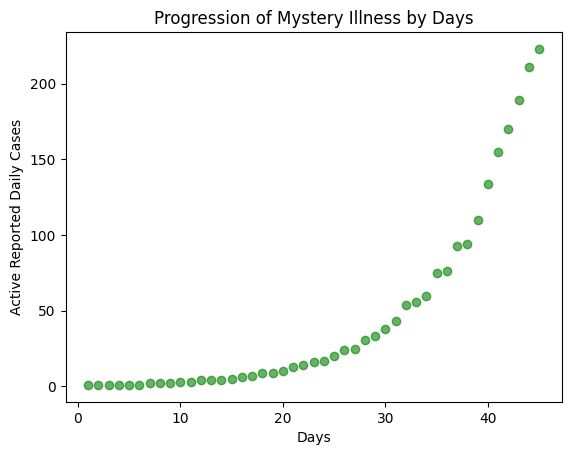

In [12]:
# Plotting the scatter graph
plt.scatter(x_day, y_cases, alpha=0.6, color='green', label='Actual Data')
plt.title('Progression of Mystery Illness by Days')
plt.xlabel('Days')
plt.ylabel('Active Reported Daily Cases')
plt.show()


#### 2b.2 Analysis of Active Reported Cases

1. The progression of initial infections shows an exponential trend, with the first 20 days displaying a slower growth rate and then a rapid increase in active cases. This indicates that transmission and infection rates increase expoenetially as time passes. 

2. One way to measure the rate of viral transmission is to test different curve fits to the plotted data points and meaure the $R^2$ value. The predicted model would be an exponential fit so that the exponential formula for growth rate may be applied to figure out the transmission rate, where *A* represents initial affected population, *r* represents growth rate factor, and *t* represents the independent variable of time. The exponential model utilizing Euler's number *e* would follow the initial form of P(t) = A $e^{rt}$.

3. An important piece of information would be to see data points of active cases on a longer time scale. This may help to observe whether or not the trend follows a sigmoidal curve, indicating a carrying capacity or viral decay after acertain period of time. This would not only provide insight on the true curve of the data but also suggest the timepsan of active infection. Another important aspect to confirm whether the plot is an exponential model would be the exact number of active cases at time t = 0. Knowing the number of initial cases will help deduce a growth/transmission rate factor and deduce a curve that best fits the exponential trend. 

#### 2b.3 Applying Exponential Fit to Data Release 1

This UVA Mystery Virus shown an early epidemic growth in the form of an exponential as noted show in 2b.1 and 2b.2. Here, an exponential model is applied to the dataset from Data Release 1.

Early Epidemic Growth is modeled as I(t) = I_0 * e ^ (r*t)

I(T) = Infected Individuals at a paricular time t

I_0 = Initial number of infected people

e = Euler's Constant (represented as np.exp() in python)

r = Growth rate

t = Time (days)

Optimal Paramters: I_0 = 1.070092434441703 r = 0.11982507163586603


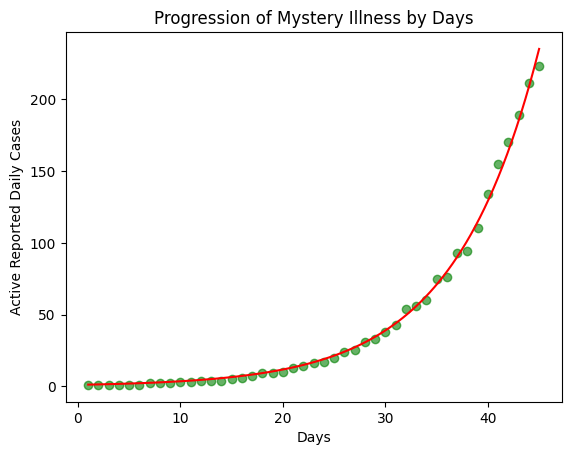

In [13]:
# Define an exponential fit to the curve in the form of y = a^(x*b)
# AI use statement: Google gemini was utilized to learn how to code for an exponential fit. 

# Calculate Exponential Function when input I_0, r, and t from the formula I(t) = I_0 * e ^ (r*t)
def exponential_function(t, I_0, r):
    return I_0 * np.exp(r * t)

# Using scipy.optimize's curve_fit function, it determines the optimal parameters popt (best-fit values), and Covariance pcov (uncertainty of the fit).
popt, pcov = curve_fit(exponential_function, x_day, y_cases)

# Covariance is not utilized in this research

# Extract the two parameters from what is determined by the curve_fit function's optimal parameter
optimal_I_0, optimal_r = popt

# Print the optimal parameters
print(f"Optimal Paramters: I_0 = {optimal_I_0} r = {optimal_r}")

# With optimal I_0 and optimal_r, all the information is obtained to plot the exponential graph.

# Creating the coordinates for the exponential graphs
# Creating 100 instances between the smallest and highest x (day) values. This makes the ploted exponential graph look more smooth.
x_day_predicted = np.linspace(min(x_day), max(x_day), 100) 
# Calculate the cooresponding y value that coorespond with x. (Exponential fnction with our optimal values)
y_cases_predicted = exponential_function(x_day_predicted , optimal_I_0, optimal_r)


# Plotting the scatter graph
plt.scatter(x_day, y_cases, alpha=0.6, color='green', label='Actual Data')
plt.plot(x_day_predicted, y_cases_predicted, 'r-', label = 'Fitted Curve')
plt.title('Progression of Mystery Illness by Days')
plt.xlabel('Days')
plt.ylabel('Active Reported Daily Cases')
plt.show()

#### 2b.4 Calculating R_0

R_0 is the Average number of people one infected person will infect in a completely susceptible population - describing how contagious an infectious disease is.

R_0 can be approximated as 1 + rD if rD is extermely small.

r = Growth Rate (We calculated from Exponential Curve)

D = Infectious Period 

(From our Day 2 Brief, we know that symptomatic period is approximately 5-9 days and infectious period starts approximately 2 days before symptom onset. This means that Infectious Period (D) has an apprxoimate range of 7-11 days )

In [14]:
# Calculating R0 with the formula 1+rD
# r is determined earlier by finding the optimal r value to fit the exponential curve
# d has a range of 7-11 (from Day 2 Brief)

# Calculating R_0 with the lower bound of infectious period (7 Days)
d_lower = 7
R0_lower = 1 + (optimal_r * d_lower)

# Calculating R_0 with the higher bound of infectious period (7 Days)
d_higher = 11
R0_higher = 1 + (optimal_r * d_higher)

print(f"R_0 have a range of {R0_lower} and {R0_higher}")

R_0 have a range of 1.8387755014510623 and 2.3180757879945264


#### 2b.5 Evaluating the Accuracy of R_0 Estimation

To evaluate the accuracy of the R_0 estimation, we need to evaluate the accuracy of the exponential model which supply the optimal_r values for R_0 calculations.

To determine the accuracy of the exponential model, we can do this by looking at the error the model makes. A more accurate model mean a smaller error. 

We find mean absolute error by finding error in each day (Actual - Subtracted), taking the absolute value (it doesnt matter if it is +10 or -10 compared to actual data, it is 10 wrong), and then taking the average of all errors.

In [15]:
# Determine Mean Absolute Value
# AI use statement: Google gemini was utilized to learn how to code for Mean Absolute Value

y_cases_predicted = exponential_function(x_day, optimal_I_0, optimal_r)
mae = np.mean(np.abs( y_cases - y_cases_predicted ))
print(f"Average Error (MAE): {mae:.2f} cases")

Average Error (MAE): 2.21 cases


#### 2b.6 Analysing the R_0 Values

1. What viruses have a similar R_0? 

EV-D68, Tick-Borne Encephalitis, Influenza (1918), MPox, Ebola all fall into the same range of R_0 as our UVA Mysterious vrius. (They each have an approximate R_0 of 2)

Enterovirus D68 (EV_D68) : First isolated in US during 1962, and is a respiratory disease that can cause Upper Respiratory Tract Infection (URTI), Pharyngeal congestion (stuffy throat caused by increased blood flow and inflammation in the pharynx), headache, and myalgia (Musche pain). There was an outbreak in 2014, in the US. (Xiang & Wang, 2016)

Tick-Borne Encehalitis : Central nervous system infection caused by the tick-borne encephalitis virus which is transmitted to human mostly by tick bites. Symptoms range from mild meningitis (Inflammation of meninges can cause stiff neck, fever, and headache) to severe meningoencephalitis (Inflammation of meninges and encephalo [Brain tissue] which can sometime causes paralysis). (Bogovic & Strle, 2015)

Influenza (1918) : Influenza (1918) also known as Spanish influenza resulted in an influenza pandemic during 1918-1919 that led to an estimate of 50-100 million death. The people presented with clinical illness have the symptoms of a typical influenza, but some have pneumonia and died after. (Taubenberger & Morens, 2020)

Monkey Pox (MPox): Caused by the Mpox virus that can be spread through physical contact that can present a variety of symptoms from skin lesions (dermatological) to complciations affecting the heart, occular (eyes), and immune system. (Yadav et al., 2025)

Ebola : Spread by the Ebolva virus that can be transmitted through contact with body fluid (ex. blood).  Can have a hemmorhagic fever which could lead to death. (Kadanali & Karagoz, 2015)

2. How accurate is the R_0 estimation? 

The R_0 estimation is very accurate as it has a relatively low error (2.21 cases per day) when determined by Mean Absolute Error. The small error illustrate how closely the predicted value is to the actual value . Lower the error, the higher the accuracy.


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #2</b> 

</div>



### 2c. Use Euler's method to solve the SEIR model.
This section should come from your python code after Data Release #2.

### 2d. Fit the SEIR model to the data by changing beta, gamma, and sigma.
This section should come from your python code after Data Release #2.

### 2e. Plot the model-predicted infections over time compared to the data.
This section should come from your python code after Data Release #2.

### 2e. Predict the day and amount of active cases at the peak of the epidemic spread.
This section should come from your python code after Data Release #2.



<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #3</b> 

</div>



### 2f. Plot the full dataset (Data Release #3) against your model.
This section should come from your python code after Data Release #3.


### 2g. Intervention strategies for new outbreak at VT (70 days of infection)
This section should come from your python code after Data Release #3.



## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Citations

(This is not yet formated but just copy and pasted link. This will be formated prior to the end of the module!)

https://pmc.ncbi.nlm.nih.gov/articles/PMC7171721/

https://pmc.ncbi.nlm.nih.gov/articles/PMC4419106/

https://pmc.ncbi.nlm.nih.gov/articles/PMC7528857/

https://www.mdpi.com/1999-4915/17/6/753#Complications_Associated_with_Mpox

https://pmc.ncbi.nlm.nih.gov/articles/PMC5175058/

Pardoe, I., Simon, L., & Young, D. (2018). Lesson 2.5: The coefficient of determination, r-squared. Pennsylvania State University, STAT 462: Regression Methods. https://online.stat.psu.edu/stat462/node/95/